## Using the N-Body Method

Having written an n-body right hand side function and bound the gravitational acceleration, lets try it out!

Begin by resurrecting your ode code and doing some runs with initial conditions provided below. We know our best bet will be the Euler-Richardson algorithm. Integrate through 100 time units and plot the result.

I've left plotting code to save you some time with that.

For each of the initial conditions, find the maximum allowable time step the allows visually acceptable repeating orbits for 100 time steps. Record those time steps for future reference.

After completing that exercise, implement the fourth order Runge Kutta algorithm as part of your ODE solving function and repeat the above exercise. Are you doing better in terms of time steps? What about the number of function calls.

**Note:** I've tried to save you the hassle of writing plotting code. I figure you've done enough of that this semester. The problem is, I don't think mine is especially tidy. If you feel like replacing mine with something better, by all means, go for it.

### Runge Kutta

The simplest but steadiest performance can be realized with the *fourth order Runge-Kutta* integration methods. The following equations haver errors of order $\mathcal{O}(\Delta t^5)$. They can be expressed as.

$$
\begin{align}
k_1 &=& &\Delta t f(t_n,y_n)\\
k_2 &=& &\Delta t f(t_n + \frac{1}{2}\Delta t,y_n + \frac{1}{2} k_1)\\
k_3 &=& &\Delta t f(t_n + \frac{1}{2}\Delta t,y_n + \frac{1}{2} k_2)\\
k_4 &=& &\Delta t f(t_n + \frac{1}{2}\Delta t,y_n +  k_3)
\end{align}
$$

$$y_{n+1} = y_n + \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4 $$

In [1]:
import numpy as np

from ode_solver import ODESolver
from n_body_working import *
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML

#TODO: Find the dts that make the following ICs stable
# Order is all coordinates then all velocities in groups by mass:
# x1,y1,x2,y2,x3,y3,vx1,vy1,vx2,vy2,etc
euler      = np.array([0,0,1,0,-1,0,0,0,0,.8,0,-.8])

montgomery = np.array([0.97000436,-0.24308753,-0.97000436,0.24308753, 0., 0.,
                    0.466203685, 0.43236573, 0.466203685, 0.43236573,
                   -0.93240737,-0.86473146])
lagrange   = np.array([1.,0.,-0.5,0.866025403784439, -0.5,-0.866025403784439,
                  0.,0.8,-0.692820323027551,-0.4, 0.692820323027551, -0.4])

p3 = {'m':[1,1,1],'G':1,'dimension':2, 'fix_first':False}

# Euler Initial Conditions #

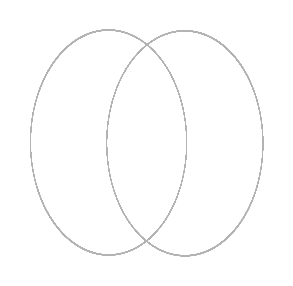

In [2]:
plt.style.use('dark_background')
%matplotlib inline

y0 = euler
p  = p3
d = p['dimension']
dt = 0.0025  # This is wrong - figure it out!
t_span = [0,100]

solver = ODESolver()
t_s,y = solver.solve_ode(n_body,t_span, y0, solver.EulerRichardson, p,first_step=dt)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
for i in range(0,y0.size//d,d):
    x_t = y[:,i]
    y_t = y[:,i+1]
    if x_min > x_t.min(): x_min = x_t.min()
    if x_max < x_t.max(): x_max = x_t.max()
    if y_min > y_t.min(): y_min = y_t.min()
    if y_max < y_t.max(): y_max = y_t.max()

    ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.5) 

plt.xlim([1.2*x_min,1.2*x_max])
plt.ylim([1.2*y_min,1.2*y_max])

ax.axis('off')
plt.show()

### Euler Initial Conditions Analysis ###
These initial conditions require a $\Delta t$ of 0.0025 to acheive repeatable orbits for 100 time steps

# Montgomery Initial Conditions #

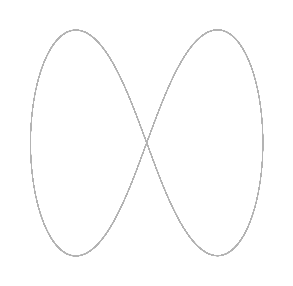

In [3]:
plt.style.use('dark_background')
%matplotlib inline

y0 = montgomery
p  = p3
d = p['dimension']
dt = 0.01  # This is wrong - figure it out!
t_span = [0,100]

solver = ODESolver()
t_s,y = solver.solve_ode(n_body,t_span, y0, solver.EulerRichardson, p,first_step=dt)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
for i in range(0,y0.size//d,d):
    x_t = y[:,i]
    y_t = y[:,i+1]
    if x_min > x_t.min(): x_min = x_t.min()
    if x_max < x_t.max(): x_max = x_t.max()
    if y_min > y_t.min(): y_min = y_t.min()
    if y_max < y_t.max(): y_max = y_t.max()

    ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.5) 

plt.xlim([1.2*x_min,1.2*x_max])
plt.ylim([1.2*y_min,1.2*y_max])

ax.axis('off')
plt.show()

### Montgomery Initial Conditions Analysis ###
These initial conditions require a $\Delta t$ of 0.01 to acheive repeatable orbits for 100 time steps

# Lagrange Initial Conditions #

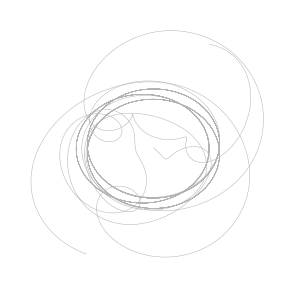

In [4]:
plt.style.use('dark_background')
%matplotlib inline

y0 = lagrange
p  = p3
d = p['dimension']
dt = 0.001  # This is wrong - figure it out!
t_span = [0,100]

solver = ODESolver()
t_s,y = solver.solve_ode(n_body,t_span, y0, solver.EulerRichardson, p,first_step=dt)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
for i in range(0,y0.size//d,d):
    x_t = y[:,i]
    y_t = y[:,i+1]
    if x_min > x_t.min(): x_min = x_t.min()
    if x_max < x_t.max(): x_max = x_t.max()
    if y_min > y_t.min(): y_min = y_t.min()
    if y_max < y_t.max(): y_max = y_t.max()

    ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.5) 

plt.xlim([1.2*x_min,1.2*x_max])
plt.ylim([1.2*y_min,1.2*y_max])

ax.axis('off')
plt.show()

### Lagrange Initial Conditions Analysis ###

Even with a $\Delta t$ of 0.0001 I wasn't able to achieve a repetable orbit with 100 time steps.

# Euler Initial Conditions with Runge Kutta #

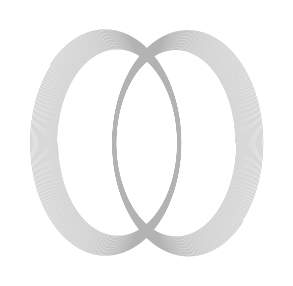

In [10]:
plt.style.use('dark_background')
%matplotlib inline

y0 = euler
p  = p3
d = p['dimension']
dt = 0.001  # This is wrong - figure it out!
t_span = [0,100]

solver = ODESolver()
t_s,y = solver.solve_ode(n_body,t_span, y0, solver.RungeKutta4, p,first_step=dt)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
for i in range(0,y0.size//d,d):
    x_t = y[:,i]
    y_t = y[:,i+1]
    if x_min > x_t.min(): x_min = x_t.min()
    if x_max < x_t.max(): x_max = x_t.max()
    if y_min > y_t.min(): y_min = y_t.min()
    if y_max < y_t.max(): y_max = y_t.max()

    ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.5) 

plt.xlim([1.2*x_min,1.2*x_max])
plt.ylim([1.2*y_min,1.2*y_max])

ax.axis('off')
plt.show()

### Euler with Runge Kutta ###
Despite the increased accuracy, the solution is worse both in terms of $\Delta t$ and the number of function calls. Even with half the $\Delta t$ as in the EulerRichardson method the orbit is just borderline repeatable, and the number of function calls is doubled.

# Montgomery Initial Conditions with Runge Kutta #

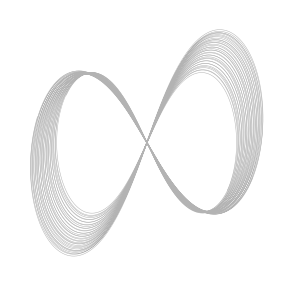

In [12]:
plt.style.use('dark_background')
%matplotlib inline

y0 = montgomery
p  = p3
d = p['dimension']
dt = 0.005  # This is wrong - figure it out!
t_span = [0,100]

solver = ODESolver()
t_s,y = solver.solve_ode(n_body,t_span, y0, solver.RungeKutta4, p,first_step=dt)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
for i in range(0,y0.size//d,d):
    x_t = y[:,i]
    y_t = y[:,i+1]
    if x_min > x_t.min(): x_min = x_t.min()
    if x_max < x_t.max(): x_max = x_t.max()
    if y_min > y_t.min(): y_min = y_t.min()
    if y_max < y_t.max(): y_max = y_t.max()

    ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.5) 

plt.xlim([1.2*x_min,1.2*x_max])
plt.ylim([1.2*y_min,1.2*y_max])

ax.axis('off')
plt.show()

### Montgomery I.C.s with Runge Kutta Analysis ###
Similarly, the Montgomery initial conditions with Runge Kutta require a dt $\Delta t$ of at least half of what the Euler Richardson method requires for repeatable orbits.

# Lagrange Initial Conditions with Runge Kutta #

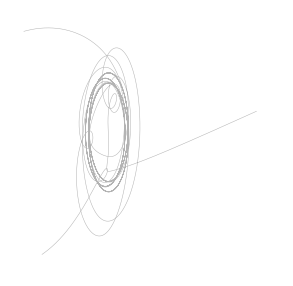

In [14]:
plt.style.use('dark_background')
%matplotlib inline

y0 = lagrange
p  = p3
d = p['dimension']
dt = 0.001  # This is wrong - figure it out!
t_span = [0,100]

solver = ODESolver()
t_s,y = solver.solve_ode(n_body,t_span, y0, solver.RungeKutta4, p,first_step=dt)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
for i in range(0,y0.size//d,d):
    x_t = y[:,i]
    y_t = y[:,i+1]
    if x_min > x_t.min(): x_min = x_t.min()
    if x_max < x_t.max(): x_max = x_t.max()
    if y_min > y_t.min(): y_min = y_t.min()
    if y_max < y_t.max(): y_max = y_t.max()

    ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.5) 

plt.xlim([1.2*x_min,1.2*x_max])
plt.ylim([1.2*y_min,1.2*y_max])

ax.axis('off')
plt.show()

### Lagrange Initial Conditions with Runge Kutta Analysis ###
Given what we saw with the values for $\Delta t$ with the Euler Richardson method, and what we've seen with needing lower values of $\Delta t$ for Runge Kutta, I am also unable to find a low enough value for $\Delta t$ that results in a stable system of orbits.

# In conclusion... #

I think there may be something useful in this whole adaptive time step business...